In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import xgboost as xgb

In [5]:
train = pd.read_csv("train.tsv")
test = pd.read_csv("test.tsv")
names = train.columns
print list(names)

['Num', 'y', 'year', 'week', 'shift', 'item_id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60']


In [6]:
frac = 0.2
part_train = train.sample(frac=frac, random_state=42)

X = part_train.drop(['Num','y'], axis=1)
y = part_train['y']
model = GradientBoostingRegressor(n_estimators=500, max_depth=5, random_state=43)
model.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=43, subsample=1.0, verbose=0,
             warm_start=False)

['year', 'week', 'shift', 'item_id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60']
64
[ 0.01252075  0.14303574  0.07131155  0.02418114  0.01221781  0.01188209
  0.01170501  0.0098745   0.01143587  0.01212424  0.01102528  0.00819361
  0.01169803  0.01206517  0.0093722   0.00832315  0.01042351  0.00956621
  0.00871316  0.01456915  0.00849977  0.00841509  0.01073536  0.00889267
  0.01256548  0.01083225  0.01065334  0.01210024  0.01061919  0.01639528
  0.02173276  0.01919249  0.0262198   0.02667149  0.01454976  0.01128726
  0.01105401  0.0110169   0.0095959   0.00936221  0.01442775  0.00929186
  0.0103459   0.01101017  0.00918248  

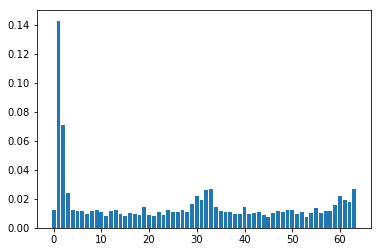

In [7]:
names = X.columns
print list(X)
print len(list(X))
from matplotlib import pyplot
print model.feature_importances_
print len(model.feature_importances_)
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [8]:


y = train['y']
X = train.drop(['Num','y'], axis=1)


X = train[['year', 'week', 'shift', 'item_id', 'f60',
'f59', 'f58', 'f57', 'f53', 'f37', 'f30', 'f29', 'f28', 
'f27', 'f26']]

model = xgb.XGBRegressor(max_depth=15, 
                         n_estimators=2000,
                         silent=False,
                         learning_rate=0.25)
#model = GradientBoostingRegressor(n_estimators=500, max_depth=10, random_state=43)#1000 15
model.fit(X, y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.2, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1)

In [12]:
def smape(F, A):
    res = 0
    for i in range(len(F)):
        res += float(abs(F[i] - A[i]) / (abs(A[i]) + abs(F[i])))
    res *= float(200) / len(F)
    return res

train_y = model.predict(train[['year', 'week', 'shift', 'item_id', 'f60',
'f59', 'f58', 'f57', 'f53', 'f37', 'f30', 'f29', 'f28', 
'f27', 'f26']])
print smape(train['y'], train_y)
preds = model.predict(test[['year', 'week', 'shift', 'item_id', 'f60',
'f59', 'f58', 'f57', 'f53', 'f37', 'f30', 'f29', 'f28', 
'f27', 'f26']])
solution = pd.read_csv("sample_submission.tsv")
solution['y'] = preds
solution.to_csv("solution.tsv", sep=',', index=False)

6.83943974255
